In [ ]:
import re
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000                   # to visualize 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

!pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/main_toys.csv',index_col='reviewTime',parse_dates=True)

In [ ]:
df.isnull().sum()

Unnamed: 0         0
overall            0
reviewerID         0
asin               0
reviewerName       0
reviewText      8596
brand            668
main_cat           0
Polarity           0
Analysis           0
dtype: int64

In [ ]:
df=df.drop('Unnamed: 0',axis=1)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,overall,reviewerID,asin,reviewerName,reviewText,brand,main_cat,Polarity,Analysis
reviewTime,,,,,,,,,
2016-09-22,2.0,A1IDMI31WEANAF,0020232233,Mackenzie Kent,comes dm screen space screen absolute premium ...,gale force nine,toys games,-0.242857,Negative
2016-09-18,1.0,A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,open letter galeforce9 unpainted miniatures ba...,gale force nine,toys games,-0.019468,Negative
2016-09-12,3.0,A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,nice art nice printing two panels filled gener...,gale force nine,toys games,0.118243,Positive
2017-03-02,5.0,A139PXTTC2LGHZ,0020232233,Ashley,amazing buy bought gift new dm perfect,gale force nine,toys games,0.578788,Positive
2017-02-08,1.0,A3IB33V29XIL8O,0020232233,Oghma_EM,review gf9 previous screens completely unneces...,gale force nine,toys games,-0.316667,Negative
...,...,...,...,...,...,...,...,...,...
2016-08-26,5.0,A3FFQ7G5V45WJ5,B01HJDGVFS,Amazon Customer,son months enjoyed playing pool,micord,toys games,0.500000,Positive
2016-01-23,5.0,A1KTVUVADLKWZO,B01HJHA7GI,Raven the Maven,e ten month old months never tires classical s...,baby einstein,baby,0.031439,Positive
2015-02-08,5.0,A2QCA9OE62IPZ4,B01HJHA7GI,crhug,perfect toy keep baby amused,baby einstein,baby,1.000000,Positive


In [ ]:
overall = df[['overall']]
print(overall.head(2))

            overall
reviewTime         
2016-09-22      2.0
2016-09-18      1.0


<Axes: xlabel='reviewTime'>

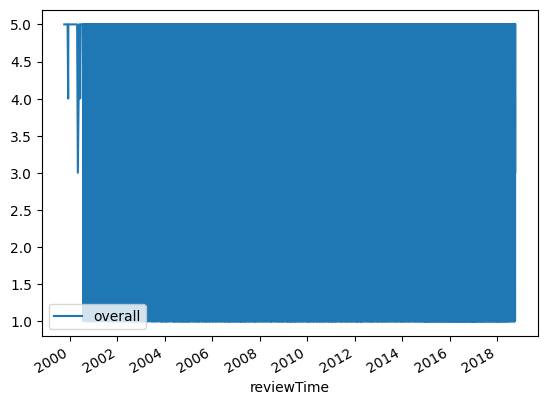

In [ ]:
overall.plot()

In [ ]:
df_data = overall.resample('M').mean()
df_data.head(2)

,overall
reviewTime,
1999-10-31,5.0
1999-11-30,5.0


In [ ]:
df_data.isnull().sum()

overall    1
dtype: int64

In [ ]:
df_data.dropna(inplace=True)

<Axes: xlabel='reviewTime'>

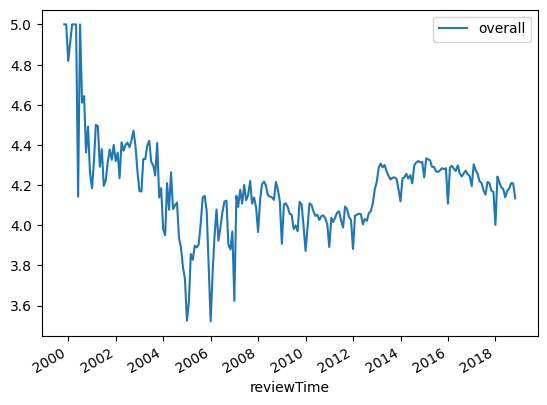

In [ ]:
df_data.plot()

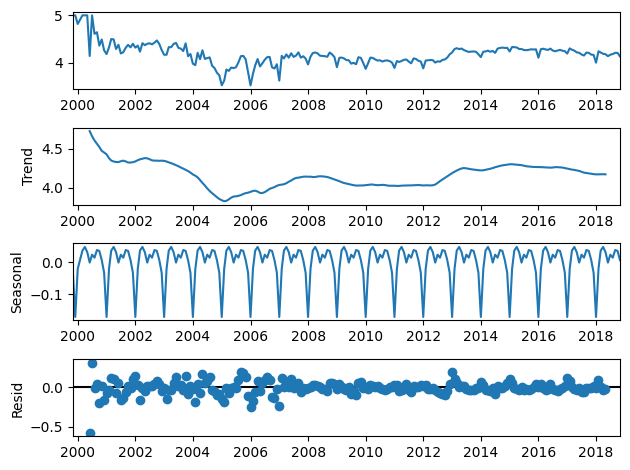

In [ ]:
df_data.sort_index(inplace=True)
ax = seasonal_decompose(df_data, model='additive',period=12)
ax.plot()
plt.show()

Moving average

In [ ]:
lags=3
moving_avg=df_data.rolling(window=lags).mean()


In [ ]:
print(moving_avg)

             overall
reviewTime          
1999-10-31       NaN
1999-11-30       NaN
1999-12-31  4.939394
2000-02-29  4.939394
2000-03-31  4.939394
...              ...
2018-06-30  4.163514
2018-07-31  4.164315
2018-08-31  4.187917
2018-09-30  4.200407
2018-10-31  4.184099

[228 rows x 1 columns]


In [ ]:
df_ts = pd.DataFrame({'actual':df_data['overall'], 'ma':moving_avg['overall']})
print(df_ts)

              actual        ma
reviewTime                    
1999-10-31  5.000000       NaN
1999-11-30  5.000000       NaN
1999-12-31  4.818182  4.939394
2000-02-29  5.000000  4.939394
2000-03-31  5.000000  4.939394
...              ...       ...
2018-06-30  4.170761  4.163514
2018-07-31  4.183071  4.164315
2018-08-31  4.209917  4.187917
2018-09-30  4.208234  4.200407
2018-10-31  4.134146  4.184099

[228 rows x 2 columns]


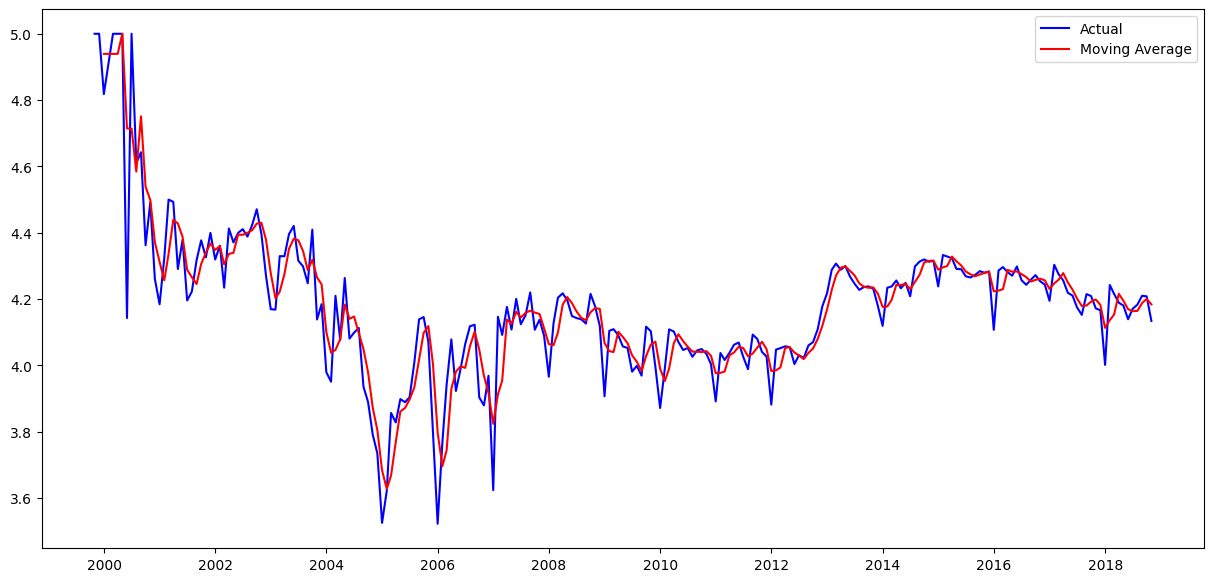

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')

plt.legend()
plt.show()

Exponential smoothing

In [ ]:
data=df_data['overall']
data.head()

reviewTime
1999-10-31    5.000000
1999-11-30    5.000000
1999-12-31    4.818182
2000-02-29    5.000000
2000-03-31    5.000000
Name: overall, dtype: float64

In [ ]:
def simplesmoothing(data,alpha):
    model1=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pred=model1.fittedvalues  #forcating values
    
    df1=pd.DataFrame({'actual':data, 'forecast':pred})
    return(model1,df1)

In [ ]:
df1=simplesmoothing(data,0.5)
df1

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7f00885df820>,
               actual  forecast
 reviewTime                    
 1999-10-31  5.000000  4.968854
 1999-11-30  5.000000  4.984427
 1999-12-31  4.818182  4.992213
 2000-02-29  5.000000  4.905198
 2000-03-31  5.000000  4.952599
 ...              ...       ...
 2018-06-30  4.170761  4.162188
 2018-07-31  4.183071  4.166475
 2018-08-31  4.209917  4.174773
 2018-09-30  4.208234  4.192345
 2018-10-31  4.134146  4.200289
 
 [228 rows x 2 columns])

In [ ]:
simple_exp = {}
alphas = [0.2, 0.5, 0.7,0.9]
models=[]

for a in alphas:
    m, df1 = simplesmoothing(data,a)
    simple_exp[a] = df1.forecast
    models.append(m)
    

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


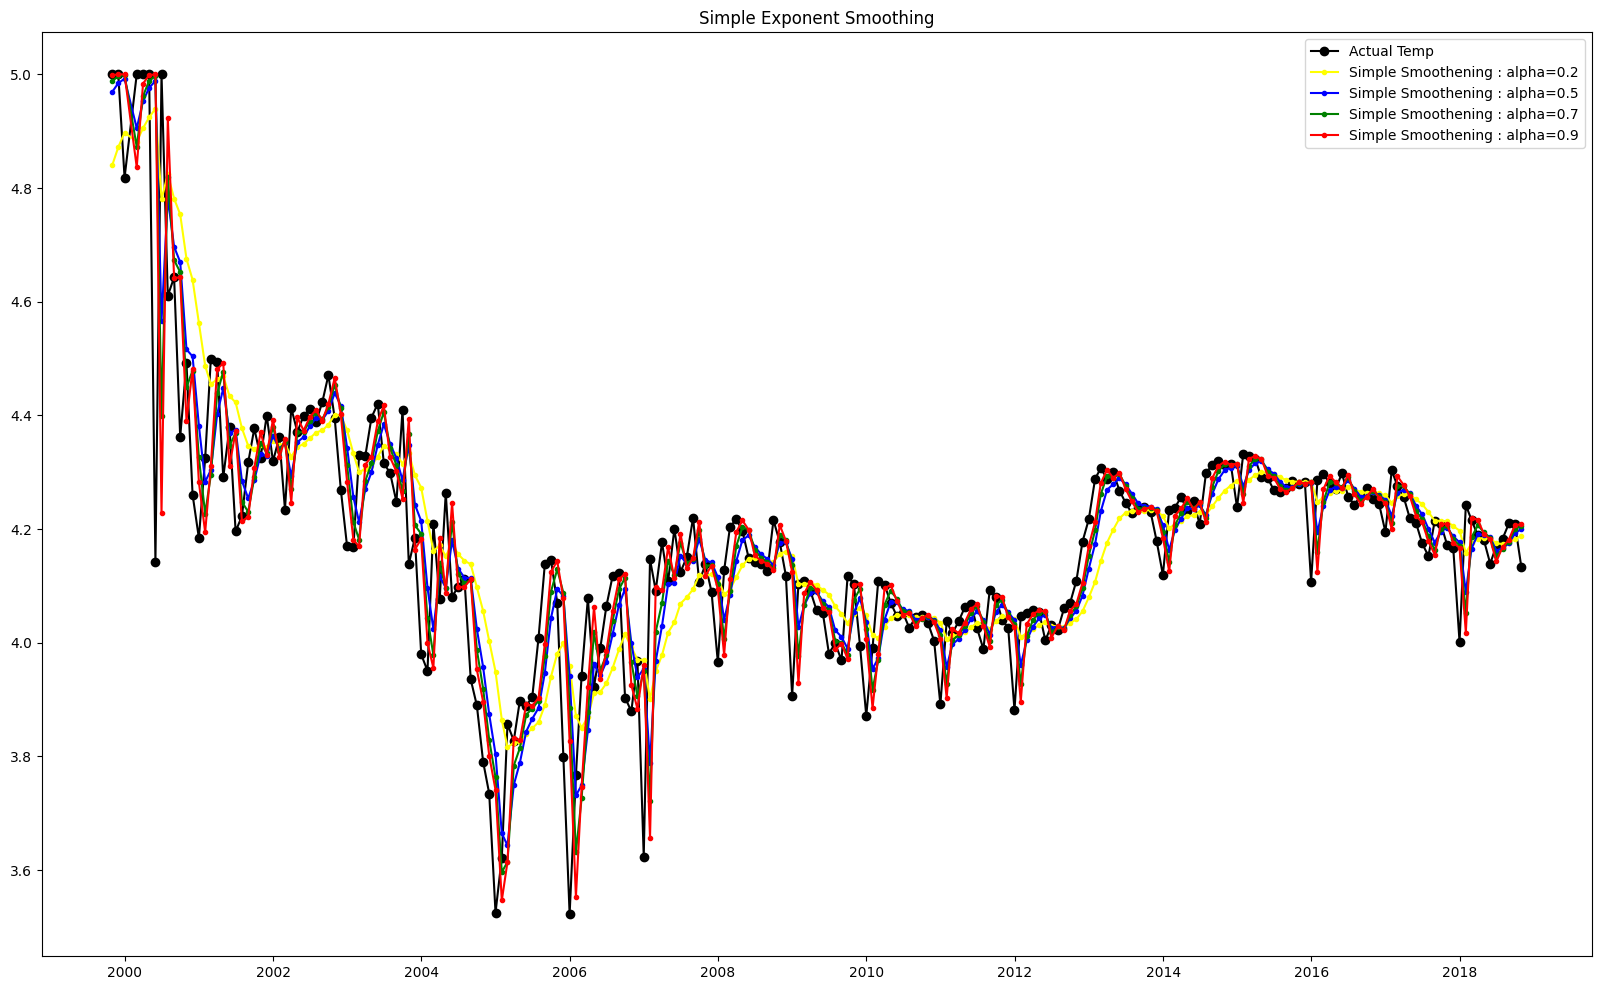

In [ ]:
colors = ['yellow','blue','green','red']

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Temp')

for i in range(len(alphas)):
    plt.plot(simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

Double exponential smoothing

In [ ]:
alpha=0.2;beta=0.3

In [ ]:
model2=ExponentialSmoothing(df_data,trend='additive').fit(smoothing_level=alpha,smoothing_trend=beta)
d_exp=model2.fittedvalues
print(d_exp)

reviewTime
1999-10-31    5.061569
1999-11-30    4.979615
1999-12-31    4.915275
2000-02-29    4.821613
2000-03-31    4.793751
                ...   
2018-06-30    4.147021
2018-07-31    4.151760
2018-08-31    4.159893
2018-09-30    4.174769
2018-10-31    4.188341
Length: 228, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Double Exponent Smoothing')

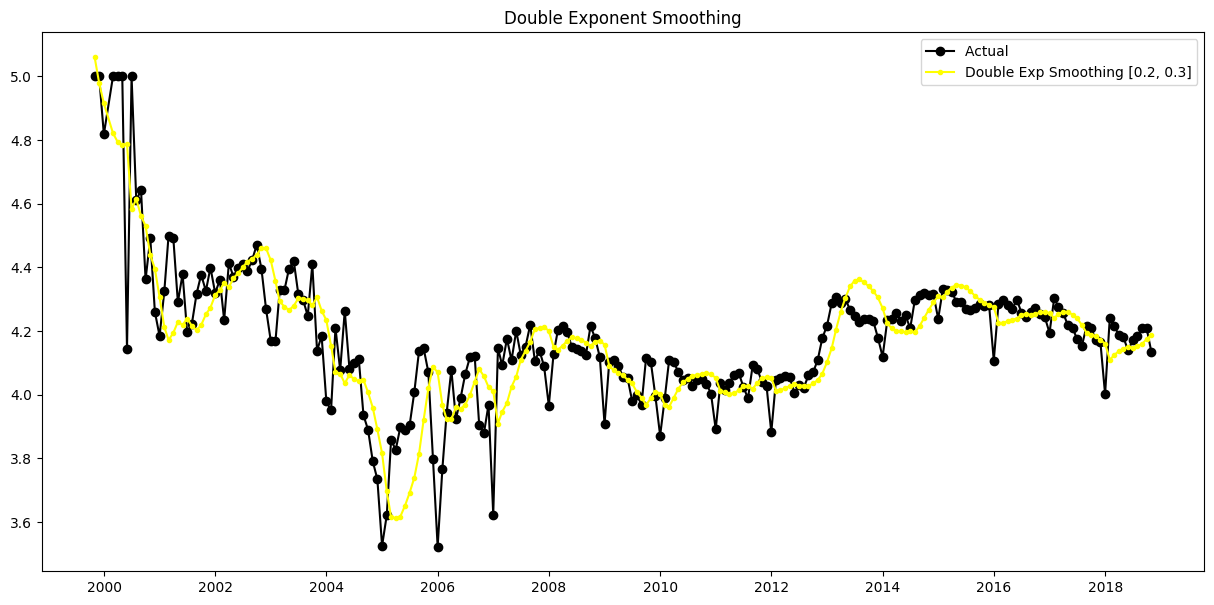

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_data,marker='o',color='black',label='Actual ')
plt.plot(d_exp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.3]')
plt.legend()
plt.title('Double Exponent Smoothing')

Triple Exponent Smoothing

In [ ]:
alpha=0.40 ;beta=0.50 ;gamma=0.25

model3=ExponentialSmoothing(df_data.overall,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

pred_model3=model3.fittedvalues

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Triple Exponent Smoothing')

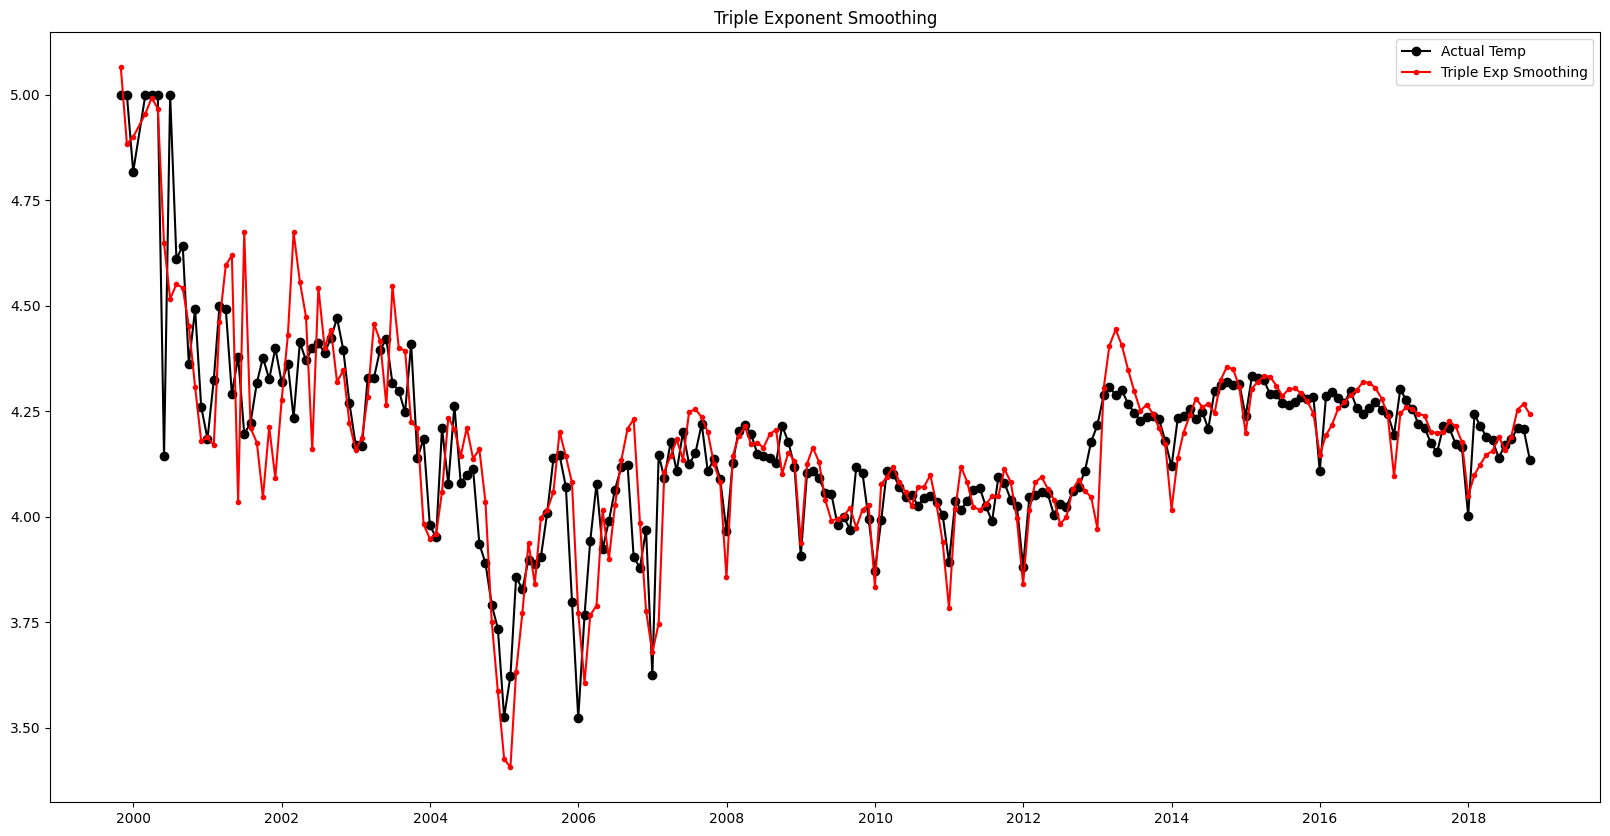

In [ ]:
ax = plt.subplots(figsize = (20,10))
plt.plot(df_data.overall, marker='o',color='black',label='Actual Temp')
plt.plot(model3.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

In [ ]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [ ]:
stcheck=checkStationarity(df_data); 
stcheck

'p-value=0.26304368855586546. Data is not stationary'

In [ ]:
df_data['diff_1'] = diff(df_data['overall'],k_diff=1)

In [ ]:
checkStationarity(df_data['diff_1'].dropna())

'p-value=2.3534469294003854e-05. Data is stationary'

### PLOT ACF and PACF

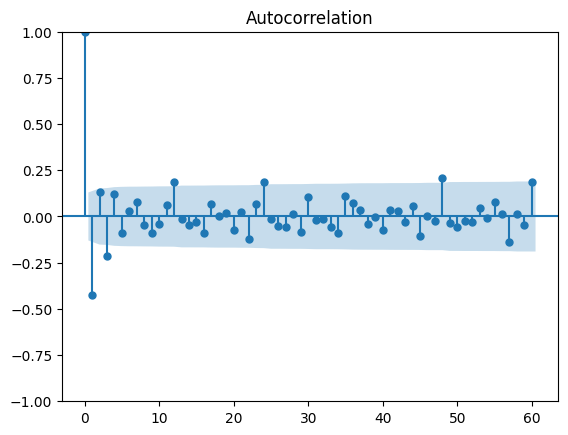

In [ ]:
plot_acf(df_data['diff_1'].dropna(),lags=60);

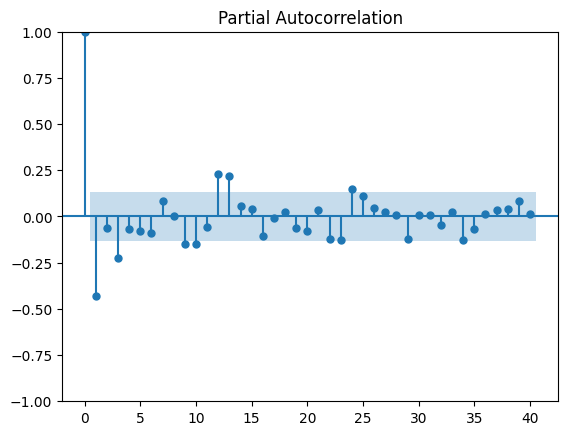

In [ ]:
plot_pacf(df_data['diff_1'].dropna(),lags=40);

In [ ]:
df_data=df_data.drop('diff_1',axis=1)

## TO SELECT p,d,q Value -> ARIMA used.

HYPERPARAMETER TUNNING (P,D,Q)lag/s -> SEASONAL COMPONENTS

P = 0
Q = 0,1
    at 12,24-> there is a spike. -> seasonal components
    1 times its repeating. (leave 12 as it occurs first time, count 24)
    lag/s -> 12 (yearly)
D = 1
HYPERPARAMETER TUNNING (p,d,q) -> NON SEASONAL COMPONENTS

INTERPRETATION:
    
    p value : 7 -> PACF
    q value : 4-> ACF
    d value : differencing done. d=1

In [ ]:
for i in range(1,8):
  for j in range (1,5):
    model= ARIMA(df_data,order=(i,1,j))
    r1=model.fit()
    print(r1.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 161.663
Date:                Mon, 03 Apr 2023   AIC                           -317.326
Time:                        06:33:34   BIC                           -307.051
Sample:                             0   HQIC                          -313.180
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0852      0.080      1.067      0.286      -0.071       0.242
ma.L1         -0.5891      0.075     -7.836      0.000      -0.736      -0.442
sigma2         0.0141      0.001     27.323      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 166.130
Date:                Mon, 03 Apr 2023   AIC                           -322.259
Time:                        06:33:35   BIC                           -305.135
Sample:                             0   HQIC                          -315.349
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5722      0.172     -3.334      0.001      -0.908      -0.236
ma.L1          0.0897      0.174      0.517      0.605      -0.251       0.430
ma.L2         -0.2354      0.109     -2.151      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 166.232
Date:                Mon, 03 Apr 2023   AIC                           -320.464
Time:                        06:33:36   BIC                           -299.914
Sample:                             0   HQIC                          -312.172
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4846      0.286     -1.692      0.091      -1.046       0.077
ma.L1          0.0007      0.291      0.003      0.998      -0.570       0.571
ma.L2         -0.2015      0.144     -1.397      0.1

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 163.439
Date:                Mon, 03 Apr 2023   AIC                           -318.878
Time:                        06:33:36   BIC                           -305.179
Sample:                             0   HQIC                          -313.350
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2496      0.140      1.788      0.074      -0.024       0.523
ar.L2          0.1730      0.109      1.585      0.113      -0.041       0.387
ma.L1         -0.7665      0.135     -5.657      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 165.416
Date:                Mon, 03 Apr 2023   AIC                           -320.832
Time:                        06:33:36   BIC                           -303.707
Sample:                             0   HQIC                          -313.921
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3344      0.284     -1.177      0.239      -0.891       0.222
ar.L2          0.3033      0.104      2.903      0.004       0.099       0.508
ma.L1         -0.1636      0.287     -0.570      0.5

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 167.293
Date:                Mon, 03 Apr 2023   AIC                           -322.587
Time:                        06:33:37   BIC                           -302.037
Sample:                             0   HQIC                          -314.295
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2544      0.119    -10.552      0.000      -1.487      -1.021
ar.L2         -0.6919      0.113     -6.138      0.000      -0.913      -0.471
ma.L1          0.7603      0.124      6.145      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 166.144
Date:                Mon, 03 Apr 2023   AIC                           -318.288
Time:                        06:33:38   BIC                           -294.313
Sample:                             0   HQIC                          -308.614
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3989      3.325     -0.120      0.905      -6.916       6.118
ar.L2          0.0409      1.852      0.022      0.982      -3.588       3.670
ma.L1         -0.1023      3.324     -0.031      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 165.849
Date:                Mon, 03 Apr 2023   AIC                           -319.698
Time:                        06:33:39   BIC                           -299.148
Sample:                             0   HQIC                          -311.406
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1975      0.305     -0.647      0.518      -0.796       0.401
ar.L2          0.1628      0.203      0.801      0.423      -0.236       0.561
ar.L3         -0.1166      0.119     -0.979      0.3

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 167.776
Date:                Mon, 03 Apr 2023   AIC                           -321.553
Time:                        06:33:40   BIC                           -297.578
Sample:                             0   HQIC                          -311.879
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1410      0.124     -9.194      0.000      -1.384      -0.898
ar.L2         -0.4615      0.170     -2.714      0.007      -0.795      -0.128
ar.L3          0.1492      0.104      1.435      0.1

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 168.053
Date:                Mon, 03 Apr 2023   AIC                           -320.106
Time:                        06:33:40   BIC                           -292.707
Sample:                             0   HQIC                          -309.050
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9614      0.633     -1.520      0.129      -2.201       0.278
ar.L2         -0.1676      0.852     -0.197      0.844      -1.837       1.502
ar.L3          0.3690      0.478      0.772      0.4

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 165.880
Date:                Mon, 03 Apr 2023   AIC                           -317.760
Time:                        06:33:41   BIC                           -293.785
Sample:                             0   HQIC                          -308.086
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0416      1.158     -0.036      0.971      -2.311       2.228
ar.L2          0.1735      0.204      0.851      0.395      -0.226       0.573
ar.L3         -0.1173      0.120     -0.977      0.3

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(4, 1, 3)   Log Likelihood                 167.804
Date:                Mon, 03 Apr 2023   AIC                           -319.609
Time:                        06:33:42   BIC                           -292.209
Sample:                             0   HQIC                          -308.552
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1438      0.156     -7.340      0.000      -1.449      -0.838
ar.L2         -0.3838      0.259     -1.484      0.138      -0.891       0.123
ar.L3          0.2627      0.243      1.079      0.2

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 168.752
Date:                Mon, 03 Apr 2023   AIC                           -319.504
Time:                        06:33:43   BIC                           -288.679
Sample:                             0   HQIC                          -307.066
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4788      0.413     -1.159      0.247      -1.289       0.331
ar.L2         -0.5877      0.299     -1.962      0.050      -1.175      -0.001
ar.L3          0.2326      0.389      0.598      0.5

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 165.936
Date:                Mon, 03 Apr 2023   AIC                           -315.873
Time:                        06:33:44   BIC                           -288.473
Sample:                             0   HQIC                          -304.817
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1551      1.832      0.085      0.933      -3.436       3.746
ar.L2          0.0898      0.555      0.162      0.871      -0.997       1.177
ar.L3         -0.1628      0.347     -0.469      0.6

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(5, 1, 3)   Log Likelihood                 167.416
Date:                Mon, 03 Apr 2023   AIC                           -316.831
Time:                        06:33:46   BIC                           -286.007
Sample:                             0   HQIC                          -304.393
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2073      0.255     -0.812      0.417      -0.707       0.293
ar.L2         -0.6042      0.288     -2.101      0.036      -1.168      -0.040
ar.L3         -0.0463      0.247     -0.187      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(5, 1, 4)   Log Likelihood                 170.610
Date:                Mon, 03 Apr 2023   AIC                           -321.219
Time:                        06:33:48   BIC                           -286.970
Sample:                             0   HQIC                          -307.399
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6194      0.519     -1.192      0.233      -1.637       0.399
ar.L2         -0.7553      0.261     -2.894      0.004      -1.267      -0.244
ar.L3         -0.0424      0.353     -0.120      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(6, 1, 2)   Log Likelihood                 166.402
Date:                Mon, 03 Apr 2023   AIC                           -314.805
Time:                        06:33:50   BIC                           -283.980
Sample:                             0   HQIC                          -302.366
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.625     -1.371      0.170      -2.084       0.368
ar.L2         -0.1950      0.691     -0.282      0.778      -1.549       1.159
ar.L3         -0.2674      0.339     -0.789      0.4

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 171.149
Date:                Mon, 03 Apr 2023   AIC                           -322.297
Time:                        06:33:50   BIC                           -288.048
Sample:                             0   HQIC                          -308.477
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6802      0.500     -1.361      0.174      -1.660       0.299
ar.L2         -0.6924      0.148     -4.670      0.000      -0.983      -0.402
ar.L3         -1.1849      0.383     -3.096      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(6, 1, 4)   Log Likelihood                 169.917
Date:                Mon, 03 Apr 2023   AIC                           -317.834
Time:                        06:33:52   BIC                           -280.159
Sample:                             0   HQIC                          -302.631
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2627      0.967     -0.272      0.786      -2.158       1.633
ar.L2          0.0889      0.974      0.091      0.927      -1.821       1.999
ar.L3          0.5345      0.609      0.878      0.3

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(7, 1, 2)   Log Likelihood                 174.131
Date:                Mon, 03 Apr 2023   AIC                           -328.262
Time:                        06:33:53   BIC                           -294.012
Sample:                             0   HQIC                          -314.441
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1571      0.093     -1.689      0.091      -0.339       0.025
ar.L2         -0.7592      0.109     -6.947      0.000      -0.973      -0.545
ar.L3         -0.5522      0.073     -7.557      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  228
Model:                 ARIMA(7, 1, 3)   Log Likelihood                 172.435
Date:                Mon, 03 Apr 2023   AIC                           -322.869
Time:                        06:33:54   BIC                           -285.195
Sample:                             0   HQIC                          -307.667
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4050      0.694      0.584      0.559      -0.955       1.765
ar.L2         -0.6442      0.202     -3.187      0.001      -1.040      -0.248
ar.L3         -0.0259      0.615     -0.042      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
m1 = auto_arima(df_data['overall'],start_p=1,max_p=7,d=1 ,start_q=1,max_q=4, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-316.323, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-267.893, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-311.439, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-317.911, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-269.707, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-316.118, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-316.519, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-319.032, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-317.326, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-317.179, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-312.997, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-317.722, Time=0.86 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.761 seconds
                               SARIMAX Results                                
Dep. Vari

In [ ]:
p=7;d=1;q=2
P=0;D=1;
for Q in range(0,2):
  model2=sm.tsa.statespace.SARIMAX(df_data['overall'],order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
  print(model2.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-pa

                                      SARIMAX Results                                      
Dep. Variable:                             overall   No. Observations:                  228
Model:             SARIMAX(7, 1, 2)x(0, 1, [], 12)   Log Likelihood                 148.670
Date:                             Mon, 03 Apr 2023   AIC                           -277.340
Time:                                     06:52:51   BIC                           -243.634
Sample:                                          0   HQIC                          -263.721
                                             - 228                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.523     -0.164      0.870      -1.112       0.940
ar.L2          0.0793      

In [ ]:
len(df_data)

228

In [ ]:
xtrain = df_data.iloc[:182]
xtest = df_data.iloc[182:]
print("xtrain = {}, xtest = {}".format(len(xtrain), len(xtest)))

xtrain = 182, xtest = 46


In [ ]:
len(xtrain)

182

In [ ]:
xtest

,overall
reviewTime,
2015-01-31,4.332785
2015-02-28,4.328393
2015-03-31,4.323087
2015-04-30,4.290951
2015-05-31,4.290103
2015-06-30,4.268606
2015-07-31,4.265180
2015-08-31,4.272884
2015-09-30,4.284161


In [ ]:
len(xtest)

46

In [ ]:
p=7;q=2;d=1;
P=0;Q=1;D=1;
final = sm.tsa.statespace.SARIMAX(xtrain['overall'],order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(final.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              overall   No. Observations:                  182
Model:             SARIMAX(7, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 116.762
Date:                              Mon, 03 Apr 2023   AIC                           -211.524
Time:                                      07:39:49   BIC                           -177.095
Sample:                                           0   HQIC                          -197.552
                                              - 182                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5322      1.891     -0.282      0.778      -4.238       3.173
ar.L2         -0.14

In [ ]:
predictions = final.predict(0,len(xtest)-1)
print(predictions)

reviewTime
1999-10-31    0.000000
1999-11-30    5.000000
1999-12-31    5.000000
2000-02-29    4.818182
2000-03-31    5.000000
2000-04-30    5.000000
2000-05-31    5.000000
2000-06-30    4.142857
2000-07-31    5.000000
2000-08-31    4.610390
2000-09-30    4.642857
2000-10-31    4.362319
2000-11-30    6.991525
2000-12-31    4.260563
2001-01-31    4.044284
2001-02-28    4.319464
2001-03-31    4.451409
2001-04-30    4.461137
2001-05-31    3.584225
2001-06-30    4.654737
2001-07-31    4.252186
2001-08-31    4.082149
2001-09-30    4.151669
2001-10-31    4.078557
2001-11-30    4.192813
2001-12-31    4.339625
2002-01-31    4.227958
2002-02-28    4.478004
2002-03-31    4.403211
2002-04-30    4.248518
2002-05-31    3.973644
2002-06-30    4.436150
2002-07-31    4.381371
2002-08-31    4.387353
2002-09-30    4.325537
2002-10-31    4.334697
2002-11-30    4.390752
2002-12-31    4.300262
2003-01-31    4.204238
2003-02-28    4.244764
2003-03-31    4.332607
2003-04-30    4.296384
2003-05-31    4.113890


In [ ]:
test_s = xtest.squeeze()
actual = []; pred = []

for i in range(len(predictions)):
  actual.append(test_s[i])
  pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0   4.332785   0.000000  4.332785
1   4.328393   5.000000 -0.671607
2   4.323087   5.000000 -0.676913
3   4.290951   4.818182 -0.527231
4   4.290103   5.000000 -0.709897
5   4.268606   5.000000 -0.731394
6   4.265180   5.000000 -0.734820
7   4.272884   4.142857  0.130027
8   4.284161   5.000000 -0.715839
9   4.279532   4.610390 -0.330858
10  4.283353   4.642857 -0.359504
11  4.107203   4.362319 -0.255116
12  4.286055   6.991525 -2.705470
13  4.296454   4.260563  0.035890
14  4.281185   4.044284  0.236901
15  4.270391   4.319464 -0.049073
16  4.298462   4.451409 -0.152947
17  4.257190   4.461137 -0.203947
18  4.242894   3.584225  0.658670
19  4.258671   4.654737 -0.396066
20  4.272239   4.252186  0.020053
21  4.253533   4.082149  0.171384
22  4.243904   4.151669  0.092234
23  4.194674   4.078557  0.116117
24  4.303445   4.192813  0.110632
25  4.275635   4.339625 -0.063990
26  4.256098   4.227958  0.028139
27  4.219177   4.478004 -0.258827
28  4.210507  

<Axes: >

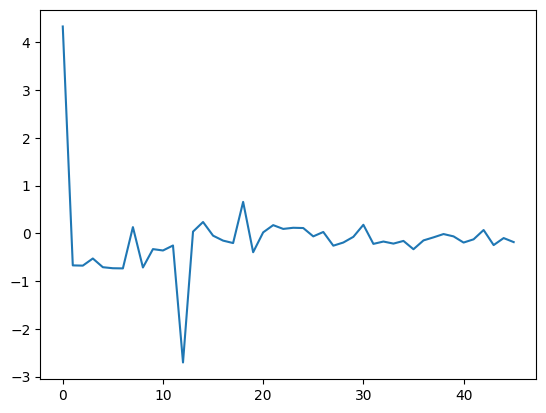

In [ ]:
df_res.err.plot()

<Axes: >

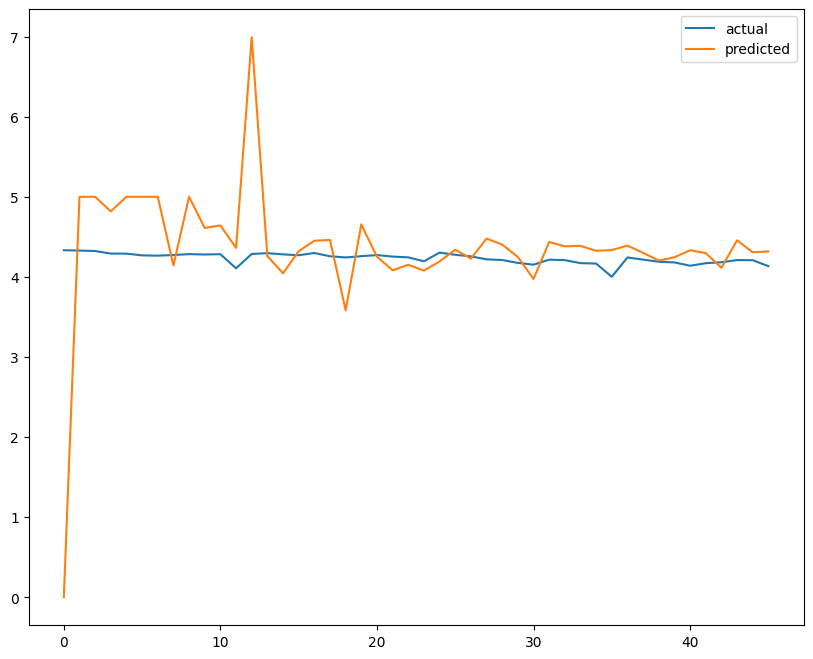

In [ ]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

In [ ]:
df_data

,overall
reviewTime,
1999-10-31,5.000000
1999-11-30,5.000000
1999-12-31,4.818182
2000-02-29,5.000000
2000-03-31,5.000000
...,...
2018-06-30,4.170761
2018-07-31,4.183071
2018-08-31,4.209917


In [ ]:
xtest

,overall
reviewTime,
2015-01-31,4.332785
2015-02-28,4.328393
2015-03-31,4.323087
2015-04-30,4.290951
2015-05-31,4.290103
2015-06-30,4.268606
2015-07-31,4.265180
2015-08-31,4.272884
2015-09-30,4.284161


In [ ]:
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

In [ ]:
df_data

,overall
reviewTime,
1999-10-31,5.000000
1999-11-30,5.000000
1999-12-31,4.818182
2000-02-29,5.000000
2000-03-31,5.000000
...,...
2018-06-30,4.170761
2018-07-31,4.183071
2018-08-31,4.209917


In [ ]:
final = sm.tsa.statespace.SARIMAX(df_data,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
fcast = final.predict(start=len(df_data), end=len(df_data)+11).rename('Forecast')

print(fcast)

228    4.155609
229    4.022482
230    4.196452
231    4.186477
232    4.188860
233    4.164656
234    4.149764
235    4.139596
236    4.139496
237    4.169360
238    4.171362
239    4.141475
Name: predicted_mean, dtype: float64


<Axes: xlabel='reviewTime'>

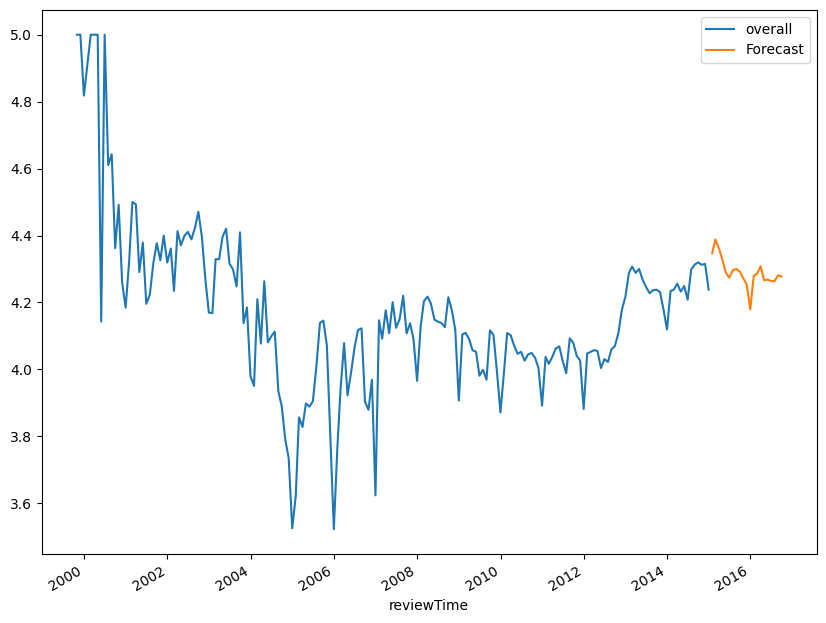

In [ ]:
xtrain.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)